In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame - TRAINING DATA, FULL SET (1460 rows)

homes = pd.read_csv('train_data.csv')
homes.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Deleting houses over $500,000 and over 4000 sq ft because they're outliers
indexSize = homes[ homes['GrLivArea'] > 4000 ].index

# # Delete these row indexes from dataFrame
homes.drop(indexSize , inplace=True)

homes['GrLivArea'].max()

3608

In [7]:
# Taking out based on price now...
indexPrice = homes[ homes['SalePrice'] > 500000 ].index

# # Delete these row indexes from dataFrame
homes.drop(indexPrice , inplace=True)

homes['SalePrice'].max()

485000

In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = homes["SalePrice"].values.reshape(-1, 1)
y = homes["GrLivArea"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1449, 1) (1449, 1)


Text(0, 0.5, 'Total Square Feet (I think)')

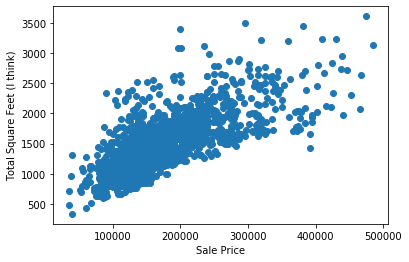

In [9]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Sale Price")
plt.ylabel("Total Square Feet (I think)")
### END SOLUTION

In [10]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [11]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [12]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 136315.50421757708
R-squared (R2 ): 0.51050764576468


In [14]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.51050764576468

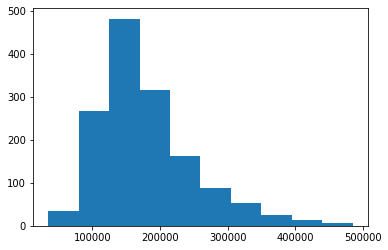

In [16]:
#histogram of sales price
plt.hist(homes['SalePrice'])
plt.show()

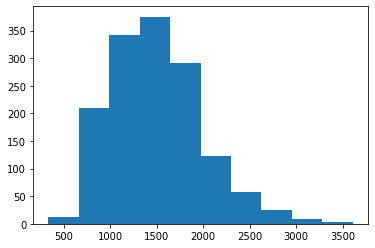

In [33]:
#histogram of sq ft
plt.hist(homes['GrLivArea'])
plt.show()

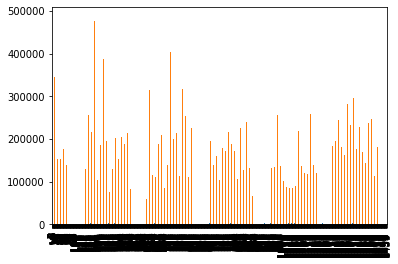

In [34]:
# new_df = {'Sales Price': homes['SalePrice'], 'Square Feet':homes['GrLivArea']}
# pd.DataFrame(new_df)
# new_df.head()

d = {'Total Square Foot' : homes['GrLivArea'], 'Sales Price' : homes['SalePrice']}

df = pd.DataFrame(d)
df.reset_index()

df.plot.bar(legend=False)
plt.show()

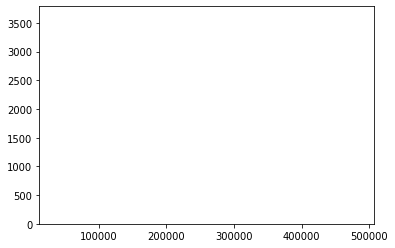

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [ ]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('../Resources/foam.csv')
foam.head()

In [ ]:
# Assign the data to X and y

X = foam[["foam", "beer"]]
y = foam["time"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [ ]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION